# The Bias Variance Tradeoff

The bias-variance tradeoff is an absolutely fundamental concept. In any modeling scenario, we can choose between *highly biased (inflexible)* models that assume a simple relationship exists in your data, or very *unbiased (flexible)* models that make looser assumptions and can therefore accomodate even very exotic relationships in your data (lots of curves and wiggles).

If you choose a model that's too strongly biased, you'll fail to capture interesting aspects of your data (**underfitting**), but on the upside whatever you do capture can be trusted (it has low variance). If, on the other hand, you choose a model that's unbiased, you might capture lots of cool structure in your data, but you won't be sure you can trust it. You might be making conclusions about noise rather than real and meaningful trends in your data (**overfitting**).

Machine learning is all about navigating this tradeoff, and finding those Goldilocks models that are flexible, but not so much so that they lead to overfitting.


# First, a life lesson: with great flexibility, comes great responsibility

The snippet of code below creates a 5th order polynomial and plots it. The coefficients c1, c2, and c5 set the relative **weights** of the polynomial terms. Play around with these and try to create the coolest shape you can. See if you can make something cooler-looking than your neighbors. Can you see how, if your data were very noisy, you could tickle and tweak parameters to get really close to all of them?

In [4]:
# import some necessary libraries
import numpy as np
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'matplotlib'

In [5]:
# THESE ARE THE VALUES TO PLAY WITH
# Uncomment one, and only one:

c1, c2, c5 = 10, 5, 0.1
#c1, c2, c5 = 0.5, -2, 1
#c1, c2, c5 = 10, 0.1, -0.01
#c1, c2, c5 = 0.2, 0.05, 0.001
#c1, c2, c5 = -5, -3, 0.5

num_data_points = 1000
x = np.linspace(-5, 5, num_data_points) # create evenly spaced points between -5 and 5

# individual polynomial terms
y1, y2, y5 = c1 * x, c2 * x**2, c5 * x**5

# our composite polynomial
y = y1 + y2 + y5

# Create the figure
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(7,4))

ax[0].plot(x, y1, 'b');
ax[0].plot(x, y2, 'g');
ax[0].plot(x, y5, 'm');
ax[0].set(xlabel='x', ylabel='y', title='your library of functions');
ax[1].plot(x, y, 'k');
ax[1].set(xlabel='x', ylabel='y', title='your composite polynomial');
plt.tight_layout()

NameError: name 'plt' is not defined

# Our example

Let's try to illustrate these ideas with a concrete example. Suppose we're interested relating cellular voltage (V) and cellular calcium ([Ca2+]). Suppose further that (for reasons we won't inquire too much about 😀) there is some iron law of the universe that precisely relates these two things, with infinite precision. Here it is:<br><br>

$V = 2 [Ca2+]^3 - 3[Ca2+]^2 + [Ca2+] + 5$

<br>

Let's render this in code and plot it.


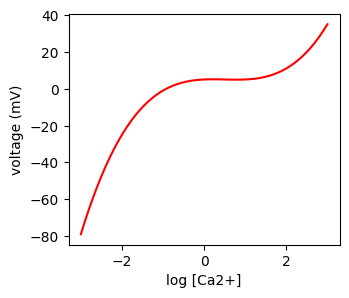

In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt

num_data_points = 60
calcium = np.linspace(-3, 3, num_data_points) # create evenly spaced points between -3 and 3
voltage = 2 * calcium**3 - 3 * calcium**2 + calcium + 5 # expression relating Ca and V

# Create the figure
plt.figure(figsize=(3.5, 3));
plt.plot(calcium, voltage, 'r');
plt.xlabel('log [Ca2+]');
plt.ylabel('voltage (mV)');

Note that the relationship is a bit 'wiggly', and is definitely not just a straight line. The technical term for that is.... wait for it... **nonlinear.** A very philosophically important point is that this relationship is a purely theoretical one. In other words, it is not something you could observe directly -- it has to be inferred from data that we've collected. We're trying to "see what lies behind" our data, appreciating that our data will always be messy and corrupted by noise.

Let's simulate some data that we might observe in a typical experiment where we're measuring both calcium and voltage. We'll do this by starting with our equation, and 'spiking' it with some noise:

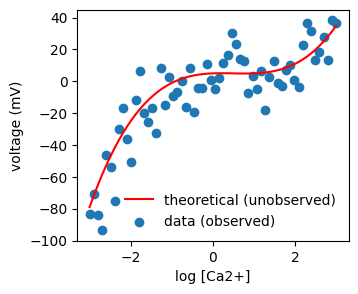

In [ ]:
# set how noisy we want our points to be
noise_level = 14

# here's where we actually create the noisy data
simulated_data = voltage + noise_level * np.random.randn(num_data_points)

# this is just plotting and cosmetic stuff
plt.figure(figsize=(3.5, 3));
plt.plot(calcium, voltage, 'r', label='theoretical (unobserved)');
plt.scatter(calcium, simulated_data, label='data (observed)');
plt.xlabel('log [Ca2+]');
plt.ylabel('voltage (mV)');
plt.legend(frameon=False);

That's *one* sample experiment, but if we repeated that experiment a bunch of times in the real world, we'd expect to see slightly different results each time. Lets simulate that process of having run a bunch of different experiments.

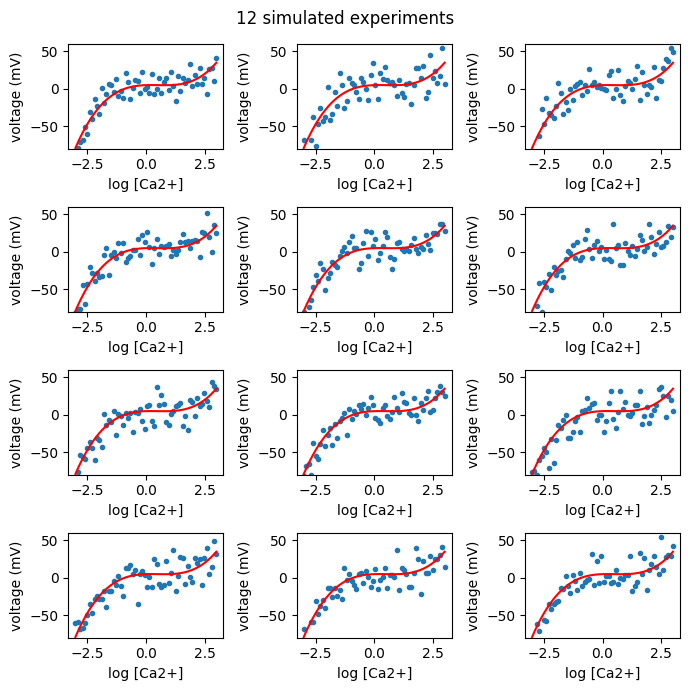

In [ ]:
# We'll pack together 12 copies of our voltage data, and spike each of them with some noise
experiments = np.tile(voltage, (12, 1)) + noise_level * np.random.randn(12, num_data_points)

# Plotting
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(7,7))
axes = axes.flatten()

for i in range(experiments.shape[0]):
  ax = axes[i]
  ax.scatter(calcium, experiments[i, :], marker='.')
  ax.plot(calcium, voltage, 'r')
  ax.set_xlabel('log [Ca2+]')
  ax.set_ylabel('voltage (mV)')
  ax.set_ylim(-80, 60)

fig.suptitle('12 simulated experiments');
plt.tight_layout()

Now the fun part. Let's fit models to each of the experiments we did above. Remember the key point that the red lines are there just to aid the eye, and show the true relationship. Only God gets to see the red line. The rest of us only see data (blue dots), and have to try to *infer the true relationship from the data*.

To illustrate the bias-variance tradeoff, we'll hit this problem with three different types of models:



1.   **A Linear model**. Just a plain old straight line. The most biased of the bunch. It's making very strong assumptions about our data (namely, that it follows a form like this):
$$V = a[Ca2+] + b$$ <br>
2.   **A tenth order polynomial model**. This is a model like: <br><br>
$V = a[Ca2+] + b[Ca2+]^2  +... + i[Ca2+]^9 + j[Ca2+]^{10} + k$ <br><br>
This is much more flexible than the linear model, which will help us track the 'wiggle' in the data, but it's overkill for our purposes. <br><br>
3. **A third order polynomial model**. This is a model like: <br><br>
$V = a[Ca2+] + b[Ca2+]^2 + c[Ca2+]^3 + d$
<br><br>
More flexible than the linear model to help us catch the wiggle, but not all kinds of crazy flexibility like the 10th order polynomial. Note that the real relationship actually IS a third order polynomial -- in other words, we know ahead of time that this model should turn out to be the best.

The code below fits the three different models to the 12 data sets. It probably looks very confusing unless you've done this sort of thing before. Don't freak out -- you're not expected to know how to do this... yet ;-)



In [ ]:
# Import libraries for doing curve fitting
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Just a cosmetic change so the data are properly formatted
idx = np.arange(experiments.shape[1]).reshape(-1,1)

# Dictionaries to hold our fitting results
linear_predictions={}
poly3_predictions={}
poly10_predictions={}

# Loop through all 12 experiments, and perform the fits:
for i in range(experiments.shape[0]):
  exp = experiments[i, :]

  # Linear fits
  lin_reg = LinearRegression().fit(idx, exp)
  linear_predictions[i] = lin_reg.predict(idx)

  # Third order polynomial fits
  poly3 = make_pipeline(PolynomialFeatures(degree=3), LinearRegression()).fit(idx, exp)
  poly3_predictions[i] = poly3.predict(idx)

  # Tenth order polynomial fits
  poly10 = make_pipeline(PolynomialFeatures(degree=10), LinearRegression()).fit(idx, exp)
  poly10_predictions[i] = poly10.predict(idx)

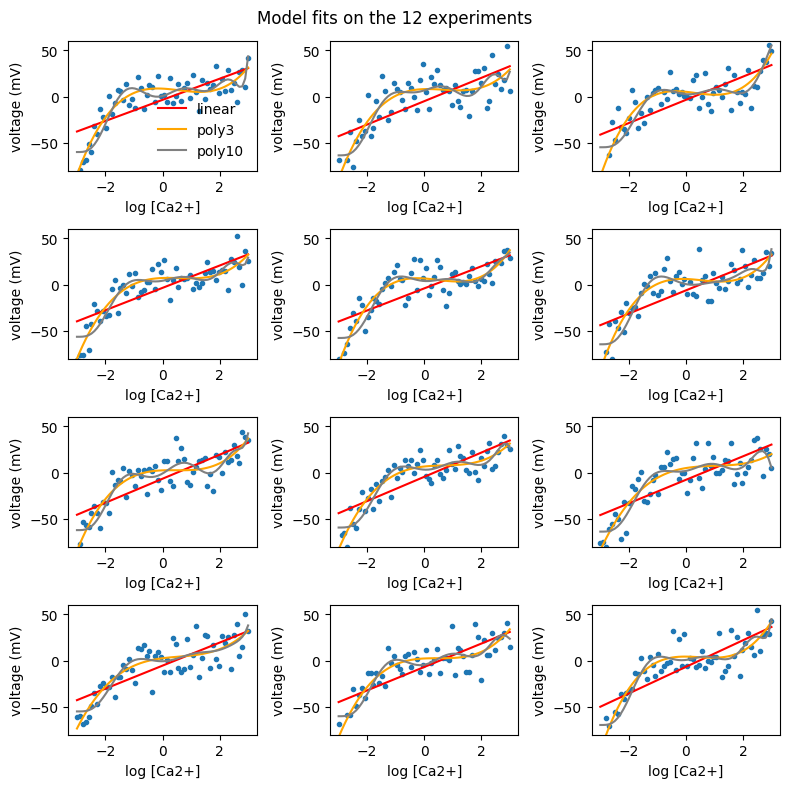

In [ ]:
# Plot the data
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(8,8))
axes = axes.flatten()

for i in range(experiments.shape[0]):
  ax = axes[i]
  ax.scatter(calcium, experiments[i, :], marker='.')
  ax.plot(calcium, linear_predictions[i], 'red', label='linear')
  ax.plot(calcium, poly3_predictions[i], 'orange', label='poly3')
  ax.plot(calcium, poly10_predictions[i], 'gray', label='poly10')
  if i==0:
    ax.legend(frameon=False)
  ax.set_xlabel('log [Ca2+]')
  ax.set_ylabel('voltage (mV)')
  ax.set_ylim(-80, 60)
fig.suptitle('Model fits on the 12 experiments');
plt.tight_layout()

In the figures above, note that the linear fits (red) are pretty crummy. There are regions where they really fail to track the underlying relationship. The 10th order polynomials (gray) are tracking more of the variability in the data, but they're clearly over-fitting and introducing spurious trends. The models track noisy idiosyncracies of the dataset in addition to the real, smoother relationship. The 3rd order polynomials (orange) are our 'just right' models. They have enough flexibility, but not so much that they're getting into trouble and overfitting. <br><br>

Lets superimpose the fits of the different model classes so we can more clearly see what's going on.

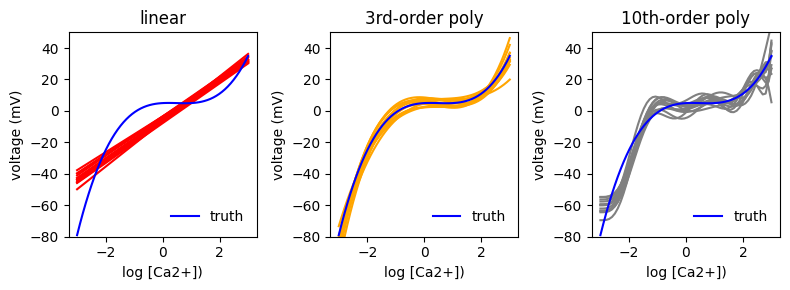

In [ ]:
all_fits = {
    'linear': linear_predictions,
    '3rd-order poly': poly3_predictions,
    '10th-order poly': poly10_predictions
    }

colors = ['red', 'orange', 'gray']
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(8, 3))

for ax, (name, matrix), color in zip(axes, all_fits.items(), colors):
  ax.set_ylim(-80, 50)
  this_model = np.array(list(matrix.values()))
  ax.plot(calcium, voltage, 'blue', zorder=100, label='truth')
  ax.legend(frameon=False, loc='lower right')
  for fit in this_model:
    ax.plot(calcium, fit, color)
    ax.set_title(name)
    ax.set_xlabel('log [Ca2+])')
    ax.set_ylabel('voltage (mV)')
plt.tight_layout()